# Tutorial about typical analysis routines

# Localizations per frame

In [1]:
from pathlib import Path

%matplotlib inline

import matplotlib.pyplot as plt

import locan as lc

In [2]:
lc.show_versions(system=False, dependencies=False, verbose=False)


Locan:
   version: 0.7.dev3+gb9aca40

Python:
   version: 3.8.8


## Load rapidSTORM data file

Identify some data in the test_data directory and provide a path using pathlib.Path

In [3]:
path = lc.ROOT_DIR / 'tests/Test_data/rapidSTORM_dstorm_data.txt'
print(path, '\n')

dat = lc.load_rapidSTORM_file(path=path, nrows=1000)

c:\users\soeren\mydata\programming\python\projects\locan\locan\tests\Test_data\rapidSTORM_dstorm_data.txt 



Print information about the data: 

In [4]:
print(dat.data.head(), '\n')
print('Summary:')
dat.print_summary()
print('Properties:')
print(dat.properties)

   position_x  position_y  frame  intensity  chi_square  local_background
0     9657.40     24533.5      0   33290.10   1192250.0           767.733
1    16754.90     18770.0      0   21275.40   2106810.0           875.461
2    14457.60     18582.6      0   20748.70    526031.0           703.370
3     6820.58     16662.8      0    8531.77   3179190.0           852.789
4    19183.20     22907.2      0   14139.60    448631.0           662.770 

Summary:
identifier: "1"
comment: ""
creation_date: "2021-03-04 13:45:10 +0100"
modification_date: ""
source: EXPERIMENT
state: RAW
element_count: 999
frame_count: 48
file_type: RAPIDSTORM
file_path: "c:\\users\\soeren\\mydata\\programming\\python\\projects\\locan\\locan\\tests\\Test_data\\rapidSTORM_dstorm_data.txt"

Properties:
{'localization_count': 999, 'position_x': 16066.234912912912, 'position_y': 17550.369092792796, 'region_measure_bb': 1064111469.8204715, 'localization_density_bb': 9.388114199807877e-07, 'subregion_measure_bb': 130483.2086

## Visualization

<AxesSubplot:title={'center':'counts'}, xlabel='position_x', ylabel='position_y'>

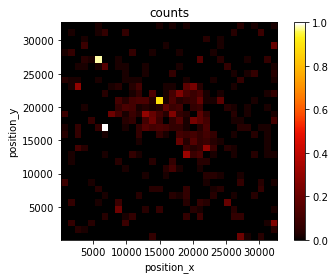

In [5]:
lc.render_2d(dat, bin_size=1000, rescale=(0,100));

### Analyze localizations per frame

We have a look at the number of localizations that were detected in each frame. 

The analysis class Localizations_per_frame provides numerical results, a plot of results versus frame, and a density graph (histogram).

In [6]:
lpf = lc.LocalizationsPerFrame()
lpf.compute(dat)

LocalizationsPerFrame(norm=None)

In [7]:
print(lpf.results.head())

frame
0    22.0
1    25.0
2    21.0
3    24.0
4    21.0
Name: n_localizations, dtype: float64


The plot shows results smoothed by a running average according to the specified window.

<AxesSubplot:title={'center':'Localizations per Frame\n (window=10)'}, xlabel='frame', ylabel='n_localizations'>

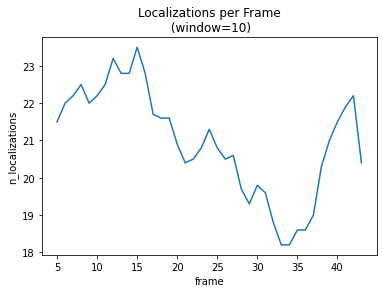

In [8]:
lpf.plot(window=10);

The histogram per default provides automatic bins, is normalized to show a probability density function and estimates a normal distribution.

<AxesSubplot:title={'center':'Localizations per Frame'}, xlabel='n_localizations', ylabel='PDF'>

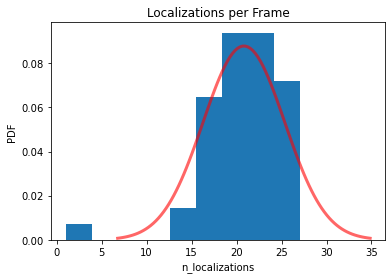

In [9]:
lpf.hist();

## Plot normalized values

We can normalize the number of localizations to any other LocData property.

In [10]:
dat.properties

{'localization_count': 999,
 'position_x': 16066.234912912912,
 'position_y': 17550.369092792796,
 'region_measure_bb': 1064111469.8204715,
 'localization_density_bb': 9.388114199807877e-07,
 'subregion_measure_bb': 130483.2086}

In [11]:
lpf = lc.LocalizationsPerFrame(norm='region_measure_bb').compute(dat)

<AxesSubplot:title={'center':'Localizations per Frame'}, xlabel='n_localizations / region_measure_bb', ylabel='PDF'>

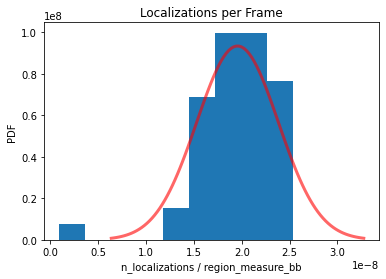

In [12]:
lpf.hist();